In [9]:
#Listing 5.13
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Listing 5.7
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Configure logging
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

# tensorboard setup
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# directories
original_dataset_dir = '/Users/roy/Downloads/kaggle_original_data/PetImages'
base_dir = '/Users/roy/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()

# opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),   
              metrics=['accuracy'])

#steps_per_epoch is the size of your dataset divided by the batch size. 
steps_per_epoch = 1000//32
validation_steps = 500//32 

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[tensorboard_callback],
    verbose=2)

model.save('cats_and_dogs_small_2.h5')

2021-12-09 20:40:21.443322: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-09 20:40:21.443337: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-09 20:40:21.443410: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)
Epoch 1/100


2021-12-09 20:40:23.596078: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-09 20:40:23.596094: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-09 20:40:24.169338: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-09 20:40:24.171644: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-09 20:40:24.174204: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211209-204021/train/plugins/profile/2021_12_09_20_40_24

2021-12-09 20:40:24.176950: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211209-204021/train/plugins/profile/2021_12_09_20_40_24/Roys-MacBook-Pro.local.trace.json.gz
2021-12-09 20:40:24.185826: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211209-204021/tr

31/31 - 19s - loss: 0.6925 - accuracy: 0.5328 - val_loss: 0.6966 - val_accuracy: 0.4708
Epoch 2/100
31/31 - 17s - loss: 0.6929 - accuracy: 0.5333 - val_loss: 0.6913 - val_accuracy: 0.5063
Epoch 3/100
31/31 - 18s - loss: 0.6904 - accuracy: 0.5333 - val_loss: 0.6805 - val_accuracy: 0.5188
Epoch 4/100
31/31 - 18s - loss: 0.6824 - accuracy: 0.5615 - val_loss: 0.6705 - val_accuracy: 0.6167
Epoch 5/100
31/31 - 19s - loss: 0.6739 - accuracy: 0.5575 - val_loss: 0.6661 - val_accuracy: 0.5875
Epoch 6/100
31/31 - 18s - loss: 0.6688 - accuracy: 0.5973 - val_loss: 0.6622 - val_accuracy: 0.5938
Epoch 7/100
31/31 - 19s - loss: 0.6754 - accuracy: 0.5776 - val_loss: 0.6547 - val_accuracy: 0.5875
Epoch 8/100
31/31 - 19s - loss: 0.6658 - accuracy: 0.5857 - val_loss: 0.6457 - val_accuracy: 0.5896
Epoch 9/100
31/31 - 18s - loss: 0.6607 - accuracy: 0.5973 - val_loss: 0.6384 - val_accuracy: 0.6313
Epoch 10/100
31/31 - 19s - loss: 0.6511 - accuracy: 0.6058 - val_loss: 0.6464 - val_accuracy: 0.6062
Epoch 11/10

Epoch 83/100
31/31 - 19s - loss: 0.5216 - accuracy: 0.7285 - val_loss: 0.5277 - val_accuracy: 0.7000
Epoch 84/100
31/31 - 19s - loss: 0.5069 - accuracy: 0.7449 - val_loss: 0.5844 - val_accuracy: 0.7229
Epoch 85/100
31/31 - 20s - loss: 0.5185 - accuracy: 0.7398 - val_loss: 0.5013 - val_accuracy: 0.7375
Epoch 86/100
31/31 - 20s - loss: 0.4719 - accuracy: 0.7684 - val_loss: 0.4753 - val_accuracy: 0.7771
Epoch 87/100
31/31 - 19s - loss: 0.4901 - accuracy: 0.7591 - val_loss: 0.5256 - val_accuracy: 0.7437
Epoch 88/100
31/31 - 20s - loss: 0.4965 - accuracy: 0.7674 - val_loss: 0.4905 - val_accuracy: 0.7542
Epoch 89/100
31/31 - 20s - loss: 0.4688 - accuracy: 0.7702 - val_loss: 0.4839 - val_accuracy: 0.7333
Epoch 90/100
31/31 - 20s - loss: 0.4735 - accuracy: 0.7702 - val_loss: 0.5222 - val_accuracy: 0.7208
Epoch 91/100
31/31 - 20s - loss: 0.5054 - accuracy: 0.7459 - val_loss: 0.5082 - val_accuracy: 0.7396
Epoch 92/100
31/31 - 20s - loss: 0.4855 - accuracy: 0.7560 - val_loss: 0.5447 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
1
0.47083333134651184


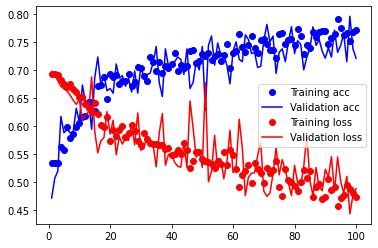

In [10]:
# Listing 5.10
import matplotlib.pyplot as plt

print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_acc = range(1, len(acc) + 1)
epochs_val = range(1, len(val_acc) + 1)

print(epochs_val[0])
print(val_acc[0])

plt.plot(epochs_acc, acc, 'bo', label='Training acc')
plt.plot(epochs_val, val_acc, 'b', label='Validation acc')
plt.legend()

plt.plot(epochs_acc, loss, 'ro', label='Training loss')
plt.plot(epochs_val, val_loss, 'r', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
# Verify images
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(train_dogs_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
#Listing 5.14 Train the convnet using data-augmentation generators